# **Организацинные вопросы**

## **Большой план (Семестр)**

1. Критерии независимости
2. Линейные модели
3. Байесовские оценки
4. Марковские процессы

## **Оценивание**

- После каждой темы будет лабораторная работа (**20 БаРС**)
- На защиту лабораторных будут выделены отдельные пары
- Подробности будут позже

## **План поменьше (Ближайшие занятия)**

1. Знакомство с colab
2. Порядковые шкалы и ранговая корреляция
  - Коэффициент ранговой корреляции Спирмена
  - Коэффициент ранговой корреляции Кенделла
3. Шкала отношения и коэффициент корреляции Пирсона
4. Номинальные шкалы и таблицы сопряжённости

# Немного про colab

### Блок знакомства с markdown



#### 4th level title

##### 5th level title

Indent.

$$
\begin{cases}
x + y = 5,\\
x^2 + y^2 = 1.
\end{cases}
$$

Another indent. *Italic text*. **Bold text**. $e^{i\pi} = -1$.
***Bold and italic text***. [Some site](https://en.wikipedia.org/wiki/Statistics)

- First simple bulleted list entry
- Second simple bulleted list entry

1. First simple numbered list entry
2. Second simple numbered list entry
   - Nested bulleted list example
   - Nested bulleted list example

### Блоки кода

In [1]:
"численные методы"
import numpy as np
import scipy

"чтение данных"
import pandas as pd

"графики"
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

#### **Простейшая задачка**
> В галерее 10000 фотографий. Из них 2000 – мемы. Из них 300 – мемы с котами. Также есть 500 мемов про программирование. Мемов про программирование с котами нет (sic!). В галерее одновременно видны 32 фотографии. Допустим, что после свайпа нам видны случайные фотки из галереи.
>
> Какова вероятность что на фотке не будет ни котов на программистов после свайпа по галерее? А по альбому с мемами?

In [2]:
"Число перестановок"
from math import comb

"Cлучайная выборка элементов из последовательности"
from random import sample

n_pics, n_cats, n_prog = 10000, 300, 500
n_sample = 32

"Теория"
proba_theory = comb(n_pics - (n_cats + n_prog), n_sample) / comb(n_pics, n_sample)

"Эксперименты!"
n = 50000
pics = [0]*(n_cats + n_prog) + [1]*(n_pics - (n_cats + n_prog))
proba_exp = sum(1 for _ in range(n) if all(x==1 for x in sample(pics, n_sample))) / n

print(f"Эксперимент: {proba_exp:.6f}")
print(f"Теория: {proba_theory:.6f}")

Эксперимент: 0.068940
Теория: 0.069077


### unix-подобные операции (!)

jupyter формат поддерживает некоторые полезные unix-подобные операции

In [3]:
"Скачиваем файл по id с google диска"
!gdown 1Qzjr5lyWbfX9gkZI9l36i4YRd4aK5cL6

"Распокуем архив"
!unzip ./height_weight.zip

"Удаляем ненужный архив"
!rm ./height_weight.zip
!mv ./SOCR-HeightWeight.csv ./hw.csv

"А что если?.."
# !rm -rf /

Downloading...
From: https://drive.google.com/uc?id=1Qzjr5lyWbfX9gkZI9l36i4YRd4aK5cL6
To: /content/height_weight.zip
100% 250k/250k [00:00<00:00, 106MB/s]
Archive:  ./height_weight.zip
  inflating: SOCR-HeightWeight.csv   


'А что если?..'

In [4]:
data_hw = pd.read_csv("./hw.csv")
data_hw.head(3)

,Index,Height(Inches),Weight(Pounds)
0,1,65.78331,112.9925
1,2,71.51521,136.4873
2,3,69.39874,153.0269


### Доступ к диску

Так можно предоставить среде доступ к Вашему google диску. Что может быть очень
удобно, например: если вы хотите сохранять промежуточные веса во время обучения
моделей.

In [12]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Файлы диска будут расположены по адресу /content/drive/MyDrive

### Работа с датасетами

In [ ]:
!ls /content/drive/MyDrive/

In [ ]:
#!pip install kagglehub[pandas-datasets]

Иногда удобно импортировать датасет напрямую из kaggle

In [5]:
import kagglehub

"Загружаем датасет"
path = kagglehub.dataset_download("ayeshasiddiqa123/student-perfirmance")

"Открываем датасет"
data_students = pd.read_csv(path + "/StudentPerformanceFactors.csv")
data_students.head(3)

Using Colab cache for faster access to the 'student-perfirmance' dataset.


,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74


In [6]:
"Столбцы, которые содержат пропуски"
print("\n".join(data_students.columns[data_students.isna().any()].tolist()))

Teacher_Quality
Parental_Education_Level
Distance_from_Home


In [7]:
"Короткая сводка по численным признакам"
data_students.describe()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
count,6607.000000,6607.000000,6607.00000,6607.000000,6607.000000,6607.000000,6607.000000
mean,19.975329,79.977448,7.02906,75.070531,1.493719,2.967610,67.235659
std,5.990594,11.547475,1.46812,14.399784,1.230570,1.031231,3.890456
min,1.000000,60.000000,4.00000,50.000000,0.000000,0.000000,55.000000
25%,16.000000,70.000000,6.00000,63.000000,1.000000,2.000000,65.000000
50%,20.000000,80.000000,7.00000,75.000000,1.000000,3.000000,67.000000
75%,24.000000,90.000000,8.00000,88.000000,2.000000,4.000000,69.000000
max,44.000000,100.000000,10.00000,100.000000,8.000000,6.000000,101.000000


### Описательная статистика

In [8]:
"Создадим ссылки на интересные нам столбцы"
exam_score = data_students['Exam_Score']
sleep_hours = data_students['Sleep_Hours']
parental_involvement = data_students['Parental_Involvement']

#### Сначала посмотрим на числовые данные

In [9]:
print('Баллы за экзамен')
print(f'\t Средний балл:\t {exam_score.mean():.3f}')
print(f'\t Оценка ско:\t {np.sqrt(exam_score.var(ddof=0)):.3f}')
print(f'\t Медиана:\t {exam_score.median():.3f}')
print(f'\t Минимум:\t {exam_score.min():.3f}')
print(f'\t Максимум:\t {exam_score.max():.3f}')

print('\nЧасы сна')
print(f'\t Среднее:\t {sleep_hours.mean():.3f}')
print(f'\t Оценка ско:\t {np.sqrt(sleep_hours.var(ddof=0)):.3f}')
print(f'\t Медиана:\t {sleep_hours.median():.3f}')
print(f'\t Минимум:\t {sleep_hours.min():.3f}')
print(f'\t Максимум:\t {sleep_hours.max():.3f}')

Баллы за экзамен
	 Средний балл:	 67.236
	 Оценка ско:	 3.890
	 Медиана:	 67.000
	 Минимум:	 55.000
	 Максимум:	 101.000

Часы сна
	 Среднее:	 7.029
	 Оценка ско:	 1.468
	 Медиана:	 7.000
	 Минимум:	 4.000
	 Максимум:	 10.000


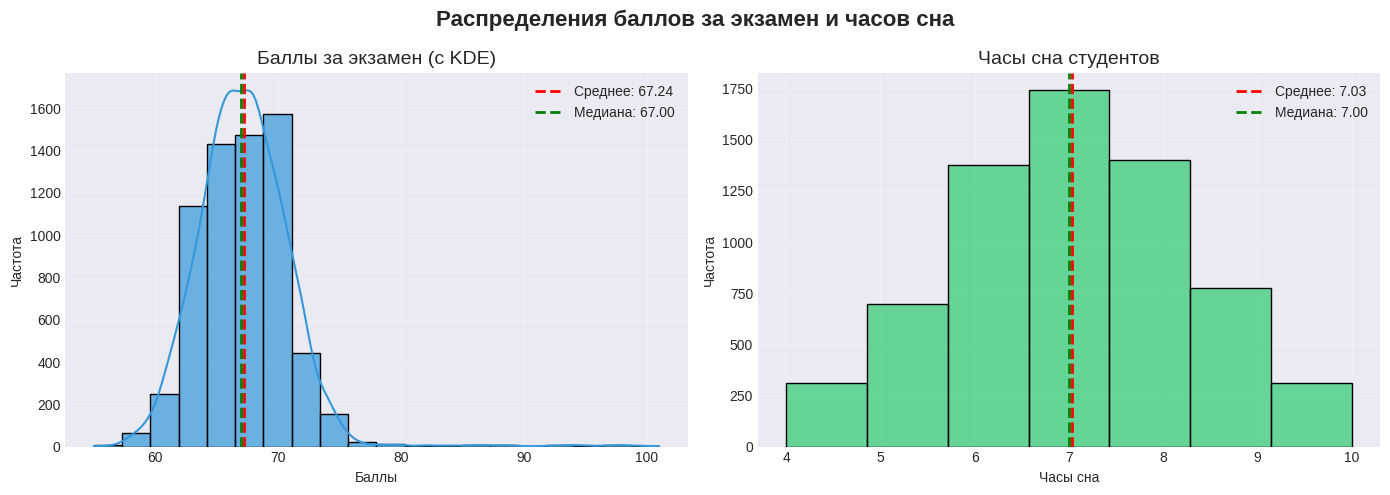

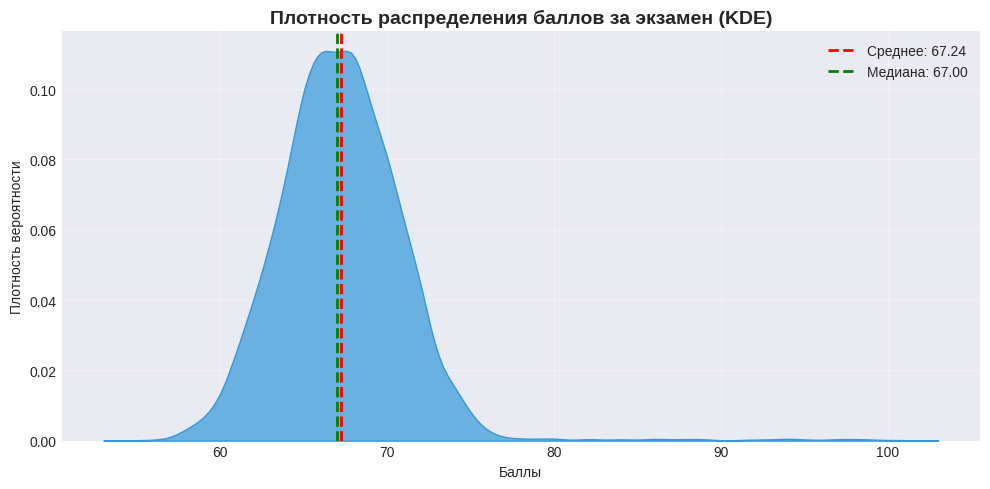

In [10]:
"Устанавливаем стиль"
plt.style.use('seaborn-v0_8-darkgrid')

"Цветовая палитра"
colors = ['#3498db', '#2ecc71']  # синий и зеленый

"ПЕРВАЯ ФИГУРА: Две гистограммы"
fig1, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))
fig1.suptitle('Распределения баллов за экзамен и часов сна', fontsize=16, fontweight='bold')

"Гистограмма для exam_score (с KDE)"
sns.histplot(data=exam_score, bins=20, kde=True, color=colors[0], alpha=0.7, ax=ax1)
ax1.axvline(exam_score.mean(), color='red', linestyle='--', linewidth=2,
           label=f'Среднее: {exam_score.mean():.2f}')
ax1.axvline(exam_score.median(), color='green', linestyle='--', linewidth=2,
           label=f'Медиана: {exam_score.median():.2f}')
ax1.set_title('Баллы за экзамен (с KDE)', fontsize=14)
ax1.set_xlabel('Баллы')
ax1.set_ylabel('Частота')
ax1.legend(fontsize=10)
ax1.grid(True, alpha=0.3)

"Гистограмма для sleep_hours"
sns.histplot(data=sleep_hours, bins=7, kde=False, color=colors[1], alpha=0.7, ax=ax2)
ax2.axvline(sleep_hours.mean(), color='red', linestyle='--', linewidth=2,
           label=f'Среднее: {sleep_hours.mean():.2f}')
ax2.axvline(sleep_hours.median(), color='green', linestyle='--', linewidth=2,
           label=f'Медиана: {sleep_hours.median():.2f}')
ax2.set_title('Часы сна студентов', fontsize=14)
ax2.set_xlabel('Часы сна')
ax2.set_ylabel('Частота')
ax2.legend(fontsize=10)
ax2.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

"ВТОРАЯ ФИГУРА: KDE с заливкой для exam_score"
fig2, ax3 = plt.subplots(1, 1, figsize=(10, 5))

"График с заливкой под KDE"
sns.kdeplot(data=exam_score, fill=True, color=colors[0], alpha=0.7, ax=ax3)
ax3.axvline(exam_score.mean(), color='red', linestyle='--', linewidth=2,
           label=f'Среднее: {exam_score.mean():.2f}')
ax3.axvline(exam_score.median(), color='green', linestyle='--', linewidth=2,
           label=f'Медиана: {exam_score.median():.2f}')
ax3.set_title('Плотность распределения баллов за экзамен (KDE)',
              fontsize=14, fontweight='bold')
ax3.set_xlabel('Баллы')
ax3.set_ylabel('Плотность вероятности')
ax3.legend(fontsize=10)
ax3.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [11]:
"Разделение выборки на две группы"
mask_gt6 = sleep_hours > 6    # больше 6 часов
mask_le6 = sleep_hours <= 6   # меньше или равно 6 часов
scores_gt6 = exam_score[mask_gt6]
scores_le6 = exam_score[mask_le6]

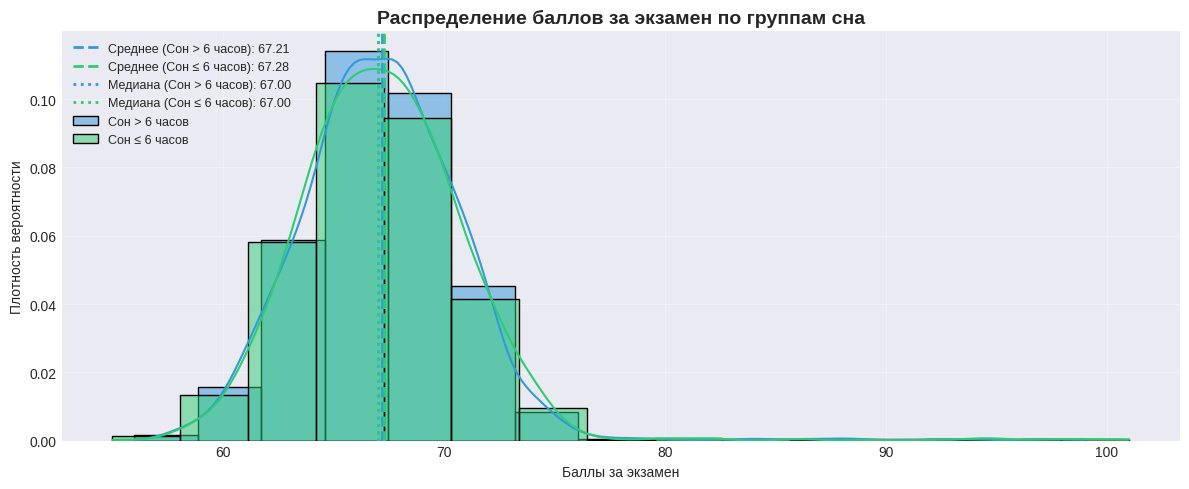

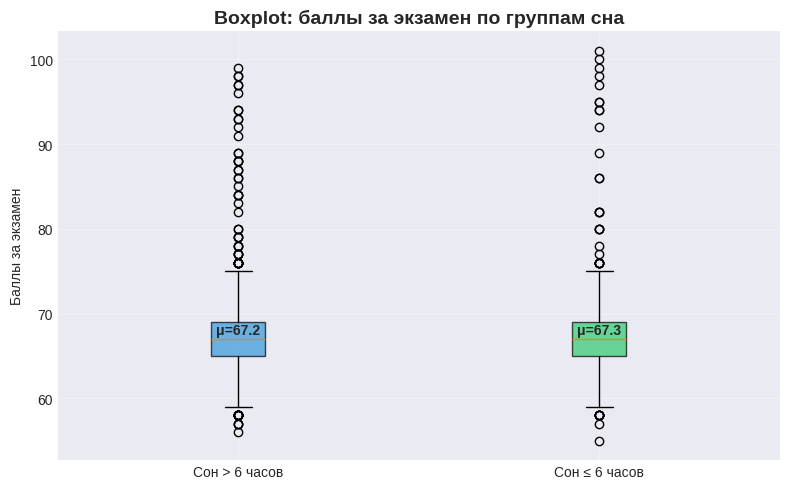

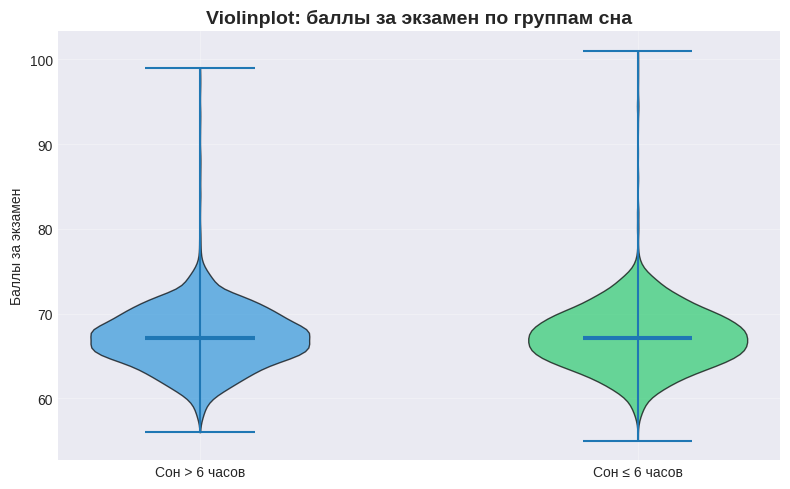


СТАТИСТИЧЕСКОЕ СРАВНЕНИЕ ГРУПП

Сон > 6 часов:
  Количество студентов: 4227
  Средний балл: 67.210
  Медианный балл: 67.000
  Стандартное отклонение: 3.840
  Минимальный балл: 56.000
  Максимальный балл: 99.000

Сон ≤ 6 часов:
  Количество студентов: 2380
  Средний балл: 67.281
  Медианный балл: 67.000
  Стандартное отклонение: 3.978
  Минимальный балл: 55.000
  Максимальный балл: 101.000

Разница в средних баллах: -0.071
Группа 'Сон > 6 часов' имеет средний балл на 0.071 баллов  ниже  чем группа 'Сон ≤ 6 часов'


In [18]:
labels = ['Сон > 6 часов', 'Сон ≤ 6 часов']
scores_list = [scores_gt6, scores_le6]
colors = ['#3498db', '#2ecc71']  # синий и зеленый

"ГИСТОГРАММЫ"
fig1, ax1 = plt.subplots(1, 1, figsize=(12, 5))

for scores, color, label in zip(scores_list, colors, labels):
    sns.histplot(data=scores, bins=15, kde=True, color=color,
                 alpha=0.5, label=label, stat='density')

ax1.axvline(scores_gt6.mean(), color=colors[0], linestyle='--', linewidth=2,
            label=f'Среднее ({labels[0]}): {scores_gt6.mean():.2f}')
ax1.axvline(scores_le6.mean(), color=colors[1], linestyle='--', linewidth=2,
            label=f'Среднее ({labels[1]}): {scores_le6.mean():.2f}')
ax1.axvline(scores_gt6.median(), color=colors[0], linestyle=':', linewidth=2,
            label=f'Медиана ({labels[0]}): {scores_gt6.median():.2f}')
ax1.axvline(scores_le6.median(), color=colors[1], linestyle=':', linewidth=2,
            label=f'Медиана ({labels[1]}): {scores_le6.median():.2f}')

ax1.set_title('Распределение баллов за экзамен по группам сна',
              fontsize=14, fontweight='bold')
ax1.set_xlabel('Баллы за экзамен')
ax1.set_ylabel('Плотность вероятности')
ax1.legend(fontsize=9, loc='upper left')
ax1.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

"BOXPLOT"
fig2, ax2 = plt.subplots(1, 1, figsize=(8, 5))

box_plot = ax2.boxplot(scores_list, tick_labels=labels, patch_artist=True)
for patch, color in zip(box_plot['boxes'], colors):
    patch.set_facecolor(color)
    patch.set_alpha(0.7)

ax2.set_title('Boxplot: баллы за экзамен по группам сна',
              fontsize=14, fontweight='bold')
ax2.set_ylabel('Баллы за экзамен')
ax2.grid(True, alpha=0.3)

"Добавляем средние значения"
for i, scores in enumerate(scores_list, 1):
    ax2.text(i, np.mean(scores), f'μ={np.mean(scores):.1f}',
             ha='center', va='bottom', fontweight='bold', fontsize=10)

plt.tight_layout()
plt.show()

"VIOLINPLOT"
fig3, ax3 = plt.subplots(1, 1, figsize=(8, 5))

violin_parts = ax3.violinplot(scores_list, showmeans=True, showmedians=True)
for i, pc in enumerate(violin_parts['bodies']):
    pc.set_facecolor(colors[i])
    pc.set_alpha(0.7)
    pc.set_edgecolor('black')

ax3.set_xticks([1, 2])
ax3.set_xticklabels(labels)
ax3.set_title('Violinplot: баллы за экзамен по группам сна',
              fontsize=14, fontweight='bold')
ax3.set_ylabel('Баллы за экзамен')
ax3.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

"Статистическое сравнение"
print("\n" + "="*60)
print("СТАТИСТИЧЕСКОЕ СРАВНЕНИЕ ГРУПП")
print("="*60)

for label, scores in zip(labels, scores_list):
    print(f"\n{label}:")
    print(f"  Количество студентов: {len(scores)}")
    print(f"  Средний балл: {scores.mean():.3f}")
    print(f"  Медианный балл: {scores.median():.3f}")
    print(f"  Стандартное отклонение: {np.sqrt(scores.var(ddof=0)):.3f}")
    print(f"  Минимальный балл: {scores.min():.3f}")
    print(f"  Максимальный балл: {scores.max():.3f}")

"Разница между группами"
mean_diff = scores_gt6.mean() - scores_le6.mean()
print(f"\nРазница в средних баллах: {mean_diff:.3f}")
print(f"Группа 'Сон > 6 часов' имеет средний балл на {abs(mean_diff):.3f} баллов ",
      "выше" if mean_diff > 0 else "ниже", " чем группа 'Сон ≤ 6 часов'")

#### Теперь посмотрим на категориальный столбец

In [13]:
"Получаем уникальные значения и их частоту"
value_counts = parental_involvement.value_counts()
unique_values = value_counts.index.tolist()
counts = value_counts.values.tolist()

for i, (value, count) in enumerate(zip(unique_values, counts), 1):
    print(f"{i}. '{value}': {count} записей \
    ({count/len(parental_involvement)*100:.1f}%)")

1. 'Medium': 3362 записей     (50.9%)
2. 'High': 1908 записей     (28.9%)
3. 'Low': 1337 записей     (20.2%)


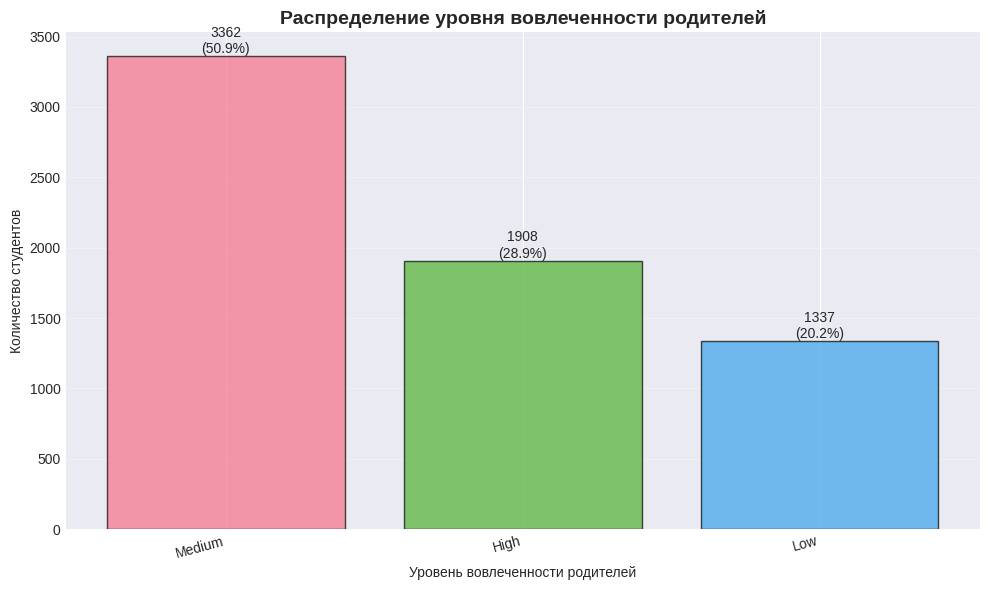

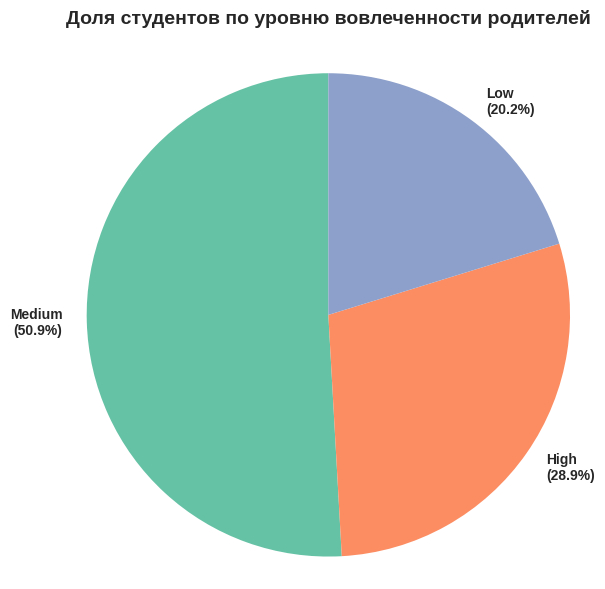

In [14]:
"BAR PLOT"
fig1, ax1 = plt.subplots(1, 1, figsize=(10, 6))

"Используем цветовую палитру seaborn для различия категорий"
colors_bar = sns.color_palette("husl", len(unique_values))
bars = ax1.bar(unique_values, counts, color=colors_bar, alpha=0.7, edgecolor='black')
ax1.set_title('Распределение уровня вовлеченности родителей',
              fontsize=14, fontweight='bold')
ax1.set_xlabel('Уровень вовлеченности родителей')
ax1.set_ylabel('Количество студентов')
ax1.grid(True, alpha=0.3, axis='y')

"Добавляем подписи значений на столбцы"
for bar, count in zip(bars, counts):
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height + 0.5,
             f'{count}\n({count/len(parental_involvement)*100:.1f}%)',
             ha='center', va='bottom', fontsize=10)

"Поворачиваем подписи по оси X для лучшей читаемости"
plt.xticks(rotation=15, ha='right')
plt.tight_layout()
plt.show()

"PIE PLOT"
fig2, ax2 = plt.subplots(1, 1, figsize=(6, 6))

"Цвета для pie chart"
colors_pie = sns.color_palette("Set2", len(unique_values))

"Создаем подписи с процентами"
labels_pie = [f'{val}\n({count/len(parental_involvement)*100:.1f}%)'
              for val, count in zip(unique_values, counts)]

"Рисуем pie chart"
wedges, texts, autotexts = ax2.pie(counts, labels=labels_pie, colors=colors_pie,
                                   autopct='', startangle=90,
                                   textprops={'fontsize': 10})
"Делаем подписи жирными"
for text in texts:
    text.set_fontweight('bold')

"Добавляем заголовок"
ax2.set_title('Доля студентов по уровню вовлеченности родителей',
              fontsize=14, fontweight='bold', pad=20)

"Делаем pie chart круглым"
ax2.axis('equal')
plt.tight_layout()
plt.show()

### **Проверка статистических гипотез**

Теоретический минимум по проверке статистических гипотез можно почитать, например, по [ссылке](https://drive.google.com/file/d/11O53NnX-liumMssluy8I8YQRG2toUCAV/view?usp=sharing).



Сравним средний балл двух групп студентов. Первая спала больше 6 часов в день, а вторая — меньше.

Для сравнения средних воспользуемся [t-тестом Уэлча](https://en.wikipedia.org/wiki/Welch%27s_t-test). Предполагается независимость выборок и нормальное распределение каждого отдельного наблюдения.

Однако так как данных очень много и не наблюдается ни видимых выбросов, ни ассиметрии, то можно пренебречь предположением нормальности в силу ЦПТ и теоремы Кохрана.

**Общая формула t-статистики**
>
>$$
t = \frac{\bar{X}_1 - \bar{X}_2}{\sqrt{\frac{s_1^2}{n_1} + \frac{s_2^2}{n_2}}}
$$

In [89]:
import numpy as np
from scipy import stats

"Проведем t-тест Уэлча"
t_statistic, p_value = stats.ttest_ind(scores_gt6, scores_le6, equal_var=False)

print(f"t-статистика: {t_statistic}")
print(f"p-значение: {p_value}")

t-статистика: -0.7052383279885114
p-значение: 0.48069623982842424


### А ещё рекомендую посмотреть [этот](https://colab.research.google.com/notebooks/basic_features_overview.ipynb) блокнот про базовые фичи colab, [этот](https://colab.research.google.com/notebooks/charts.ipynb) про графики, и [этот](https://colab.research.google.com/notebooks/io.ipynb) про внешние данные

## А как влияют родители на оценки?

In [16]:
"Разделение выборки на группы по вовлечённости родителей"
mask_pi_high = parental_involvement == "High"
mask_pi_medium = parental_involvement == "Medium"
mask_pi_low = parental_involvement == "Low"
scores_pi = {
    "High": exam_score[mask_gt6],
    "Medium": exam_score[mask_pi_medium],
    "Low": exam_score[mask_pi_low]
}